In [ ]:
#Forcast the sales for 1 year for the furniture products category.
#on the basis of historical data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r'C:\Users\Vijendra\Downloads\Sample - Superstore.xls',header=0)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

## Subsetting the Furniture Data

In [5]:
furniture = df[df['Category']== 'Furniture']
furniture.shape

(2121, 21)

In [6]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [ ]:
#furniture['Order Date']=pd.to_datetime(furniture['Order Date'])

In [7]:
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [8]:
furniture=furniture[['Order Date','Sales']]

## Sorting the data in chronological order.

In [9]:
furniture=furniture.sort_values('Order Date',ascending=True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [10]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


## Grouping the data on the basis of date/time

In [11]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [12]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


## Set Date/Time Variable as indexing column

In [13]:
furniture=furniture.set_index('Order Date')

In [14]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


## Resampling the data.

In [15]:
y = furniture['Sales'].resample("M").mean()

In [16]:
print(y.shape)
y

(48,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

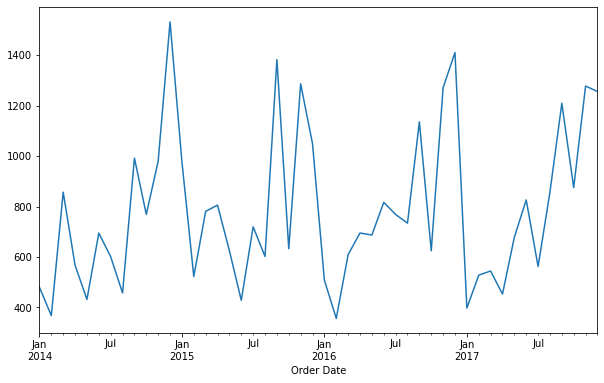

In [17]:
y.plot(figsize=(10,6))
plt.show()

## Spilt the data into Training and Testing

In [18]:
train = y.loc[:'2016-12-31']
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [19]:
test = y.loc['2017-01-31':]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

## Plotting the Train and Test data together.

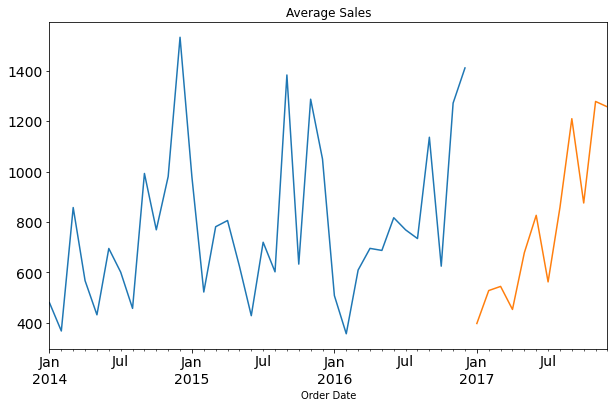

In [20]:
train.plot(figsize=(10,6),title= 'Average Sales',fontsize=14)
test.plot(figsize=(10,6),title= 'Average Sales',fontsize=14)
plt.show()

## 3rd March, 2022

# Simple Exponential Smoothing

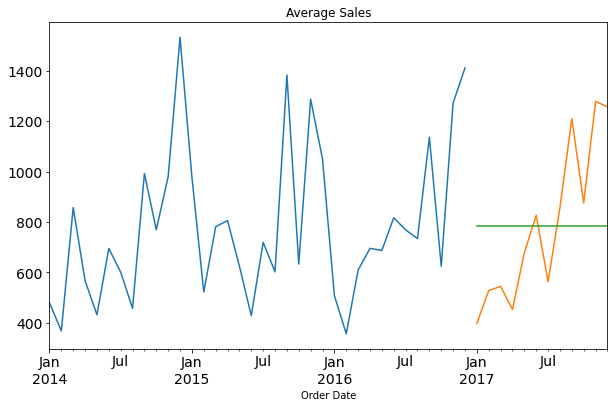

In [21]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()



In [22]:
Exp_Smooth.SES

2017-01-31    784.197181
2017-02-28    784.197181
2017-03-31    784.197181
2017-04-30    784.197181
2017-05-31    784.197181
2017-06-30    784.197181
2017-07-31    784.197181
2017-08-31    784.197181
2017-09-30    784.197181
2017-10-31    784.197181
2017-11-30    784.197181
2017-12-31    784.197181
Freq: M, dtype: float64

In [23]:
fit1.aic

415.87664216029793

In [24]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rmse)

303.47667984689787


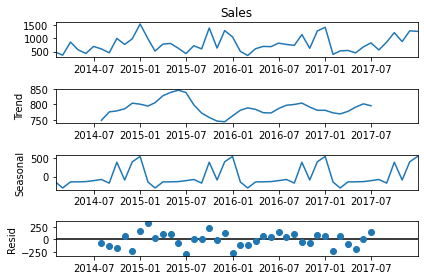

In [25]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

# Double Exponential Smoothing

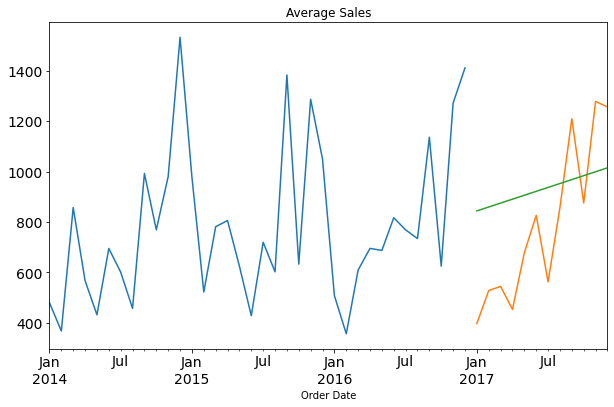

In [26]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope=0.25)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()



In [ ]:
fit1.aic

In [ ]:
Holt_df['Holt_linear']

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test, Holt_df['Holt_linear']))
print(rmse)

In [ ]:
"""
import numpy as np
for i in np.arange(0,1,0.01):
    for j in np.arange(0,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        print(fit1.aic,i,j)
"""

# Triple Exponential Smoothing

C:\Users\Vijendra\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


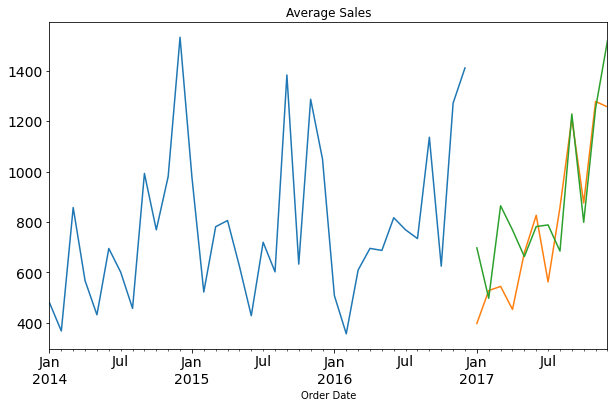

In [27]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = ExponentialSmoothing(train, seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()



In [28]:
fit1.aic

409.61009297964534

In [29]:
Holt_Winter_df['Holt_Winter']

2017-01-31     697.446276
2017-02-28     497.588394
2017-03-31     864.315882
2017-04-30     768.699022
2017-05-31     662.864152
2017-06-30     781.841882
2017-07-31     788.346273
2017-08-31     684.608466
2017-09-30    1228.218611
2017-10-31     798.937528
2017-11-30    1250.389125
2017-12-31    1518.097674
Freq: M, dtype: float64

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rmse)

193.91199045553515


# Final Forecasting

C:\Users\Vijendra\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


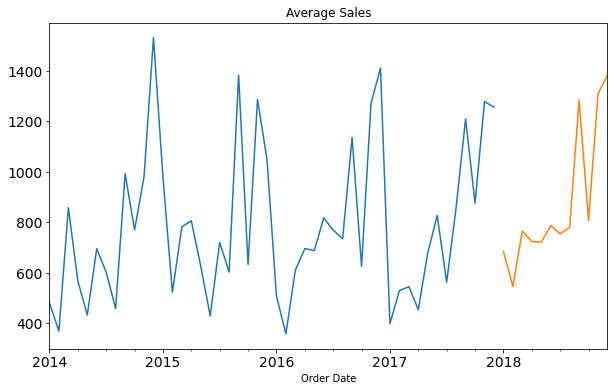

In [31]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = ExponentialSmoothing(y, seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
#Y_precitions=fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_predictions = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()



In [32]:
Y_predictions

2018-01-31     683.785695
2018-02-28     545.143471
2018-03-31     765.085014
2018-04-30     723.771119
2018-05-31     720.749723
2018-06-30     786.823479
2018-07-31     753.676714
2018-08-31     779.165092
2018-09-30    1283.338530
2018-10-31     806.502174
2018-11-30    1308.393372
2018-12-31    1382.810233
Freq: M, dtype: float64

In [ ]:
Y_predictions.to_excel("TimeSeriesOutput1.xlsx",index=True)

# SARIMA

In [33]:
import pmdarima as pm

In [ ]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

In [ ]:
#max order:p+q+P+Q <=10

In [34]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.37 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.10 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.03 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.15 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.07 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.12 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.69 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=1.18 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.00 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=1.12 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.37 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

# Buliding the SARIMA model.

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train,
               order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

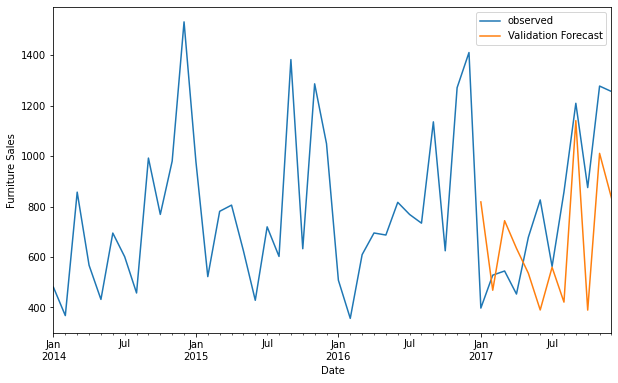

In [37]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [38]:
pred.predicted_mean

2017-01-31     818.524070
2017-02-28     468.470304
2017-03-31     744.079627
2017-04-30     634.497940
2017-05-31     535.745785
2017-06-30     390.163763
2017-07-31     559.376256
2017-08-31     421.341585
2017-09-30    1140.775335
2017-10-31     389.701073
2017-11-30    1011.052497
2017-12-31     834.732339
Freq: M, dtype: float64

In [39]:
Y_pred=pred.predicted_mean
Y_test=y['2017-01-31':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

308.7697387032402


# Final Forecasting

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
               order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

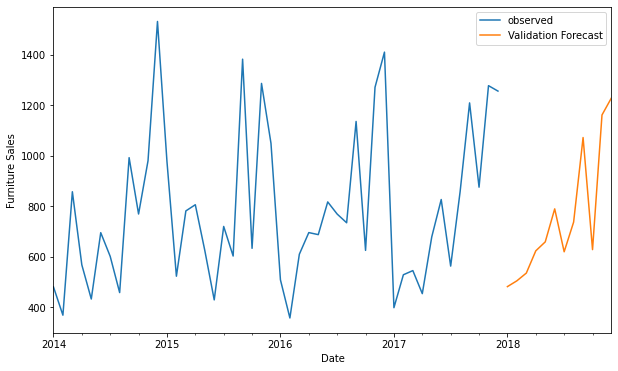

In [41]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [42]:
pred.predicted_mean

2018-01-31     481.175783
2018-02-28     504.162670
2018-03-31     534.896811
2018-04-30     623.058251
2018-05-31     658.537447
2018-06-30     789.387675
2018-07-31     619.269519
2018-08-31     736.930521
2018-09-30    1072.136422
2018-10-31     627.864100
2018-11-30    1161.662891
2018-12-31    1229.291164
Freq: M, dtype: float64

In [ ]:
pred.predicted_mean.to_excel("TimeSeriesOutput.xlsx",index=True)